In [7]:
from quantopian.research import run_pipeline

from quantopian.pipeline import Pipeline
from quantopian.pipeline.filters import QTradableStocksUS

from quantopian.pipeline.data import USEquityPricing 
from quantopian.pipeline.data.factset import Fundamentals as factset
from quantopian.pipeline.data.morningstar import Fundamentals as morningstar

from quantopian.pipeline.classifiers.fundamentals import Sector

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

In [8]:
start_date = '2003-1-1'
end_date = '2020-2-1'

factor_name = 'free_cash_flow_yield' # free cahsflow yeild

sector_labels = Sector.SECTOR_NAMES
sector_labels[-1] = 'Unknown'



In [9]:
def make_pipeline():
    
    sector = Sector()
    
    free_cash_flow = morningstar.free_cash_flow.latest
    enterprise_value = morningstar.enterprise_value.latest
    
    free_cash_flow_yield = free_cash_flow / enterprise_value
    
    factor_screen = free_cash_flow_yield.notnull()
    
    sector_screen = sector.notnull()
    
    return Pipeline(
            columns={
                factor_name: free_cash_flow_yield,
                'sector': sector
            }, screen =QTradableStocksUS() & factor_screen & sector_screen
    )

In [10]:
factor_data = run_pipeline(make_pipeline(), start_date, end_date)

In [12]:
pricing_data = get_pricing(factor_data.index.levels[1], start_date, end_date, fields='open_price')

In [14]:
pricing_data.head()

,Equity(2 [HWM]),Equity(24 [AAPL]),Equity(31 [ABAX]),Equity(39 [DDC]),Equity(41 [ARCB]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(60 [ABS]),Equity(62 [ABT]),Equity(64 [GOLD]),...,Equity(53083 [TPTX]),Equity(53084 [PLMR]),Equity(53087 [MNRL]),Equity(53089 [PINS]),Equity(53095 [ZM]),Equity(53116 [BYND]),Equity(53123 [SCPL]),Equity(53134 [PSN]),Equity(53148 [KTB]),Equity(53158 [UBER])
2003-01-02 00:00:00+00:00,53.069,0.892,3.485,16.224,21.065,10.468,3.820,20.067,11.834,12.635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03 00:00:00+00:00,54.267,0.920,3.631,16.397,22.593,10.543,3.990,20.760,11.630,12.890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06 00:00:00+00:00,55.189,0.934,3.738,17.290,22.397,10.435,3.750,20.822,11.712,13.245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07 00:00:00+00:00,56.226,0.919,3.775,16.868,22.888,10.624,4.010,20.866,11.849,12.816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08 00:00:00+00:00,50.926,0.906,3.831,16.438,22.790,10.367,3.849,20.999,11.441,12.791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
merged_data = get_clean_factor_and_forward_returns(
    factor = factor_data[factor_name],
    prices = pricing_data,
    periods = (1,4,10),
    quantiles = 5,
    groupby=factor_data['sector'],
    groupby_labels = sector_labels,
    binning_by_group = group_neutral
)

Dropped 0.5% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [16]:
merged_data.head()

1D        4D       10D  \
date                      asset                                             
2003-01-02 00:00:00+00:00 Equity(2 [HWM])    0.022574 -0.040381 -0.035614   
                          Equity(24 [AAPL])  0.031390  0.015695 -0.010090   
                          Equity(41 [ARCB])  0.072537  0.081889  0.045383   
                          Equity(60 [ABS])   0.034534  0.046444  0.016893   
                          Equity(62 [ABT])  -0.017238 -0.033209 -0.058476   

                                               factor               group  \
date                      asset                                             
2003-01-02 00:00:00+00:00 Equity(2 [HWM])    0.002078     BASIC_MATERIALS   
                          Equity(24 [AAPL])  0.017921          TECHNOLOGY   
                          Equity(41 [ARCB])  0.001965         INDUSTRIALS   
                          Equity(60 [ABS])   0.010970  CONSUMER_DEFENSIVE   
                          Equity(62 [ABT])   0.017620          HEALTHCARE   

                                             factor_quantile  
date                      asset                               
2003-01-02 00:00:00+00:00 Equity(2 [HWM])                  1  
                          Equity(24 [AAPL])                4  
                          Equity(41 [ARCB])                2  
                          Equity(60 [ABS])                 4  
                          Equity(62 [ABT])                 4

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-141.491687,0.012287,-0.042743,0.451672,1531600,20.249295
2,-0.060626,0.024909,-0.001738,0.008534,1503254,19.874533
3,-0.027127,0.040363,0.007442,0.006722,1503360,19.875934
4,-0.013519,0.083592,0.015841,0.008256,1503254,19.874533
5,0.000006,941.911847,0.052842,0.915604,1522252,20.125705


Returns Analysis


,1D,4D,10D
Ann. alpha,0.038,0.031,0.025
beta,-0.053,-0.067,-0.067
Mean Period Wise Return Top Quantile (bps),1.588,1.294,1.087
Mean Period Wise Return Bottom Quantile (bps),-1.016,-0.716,-0.548
Mean Period Wise Spread (bps),2.605,2.028,1.654


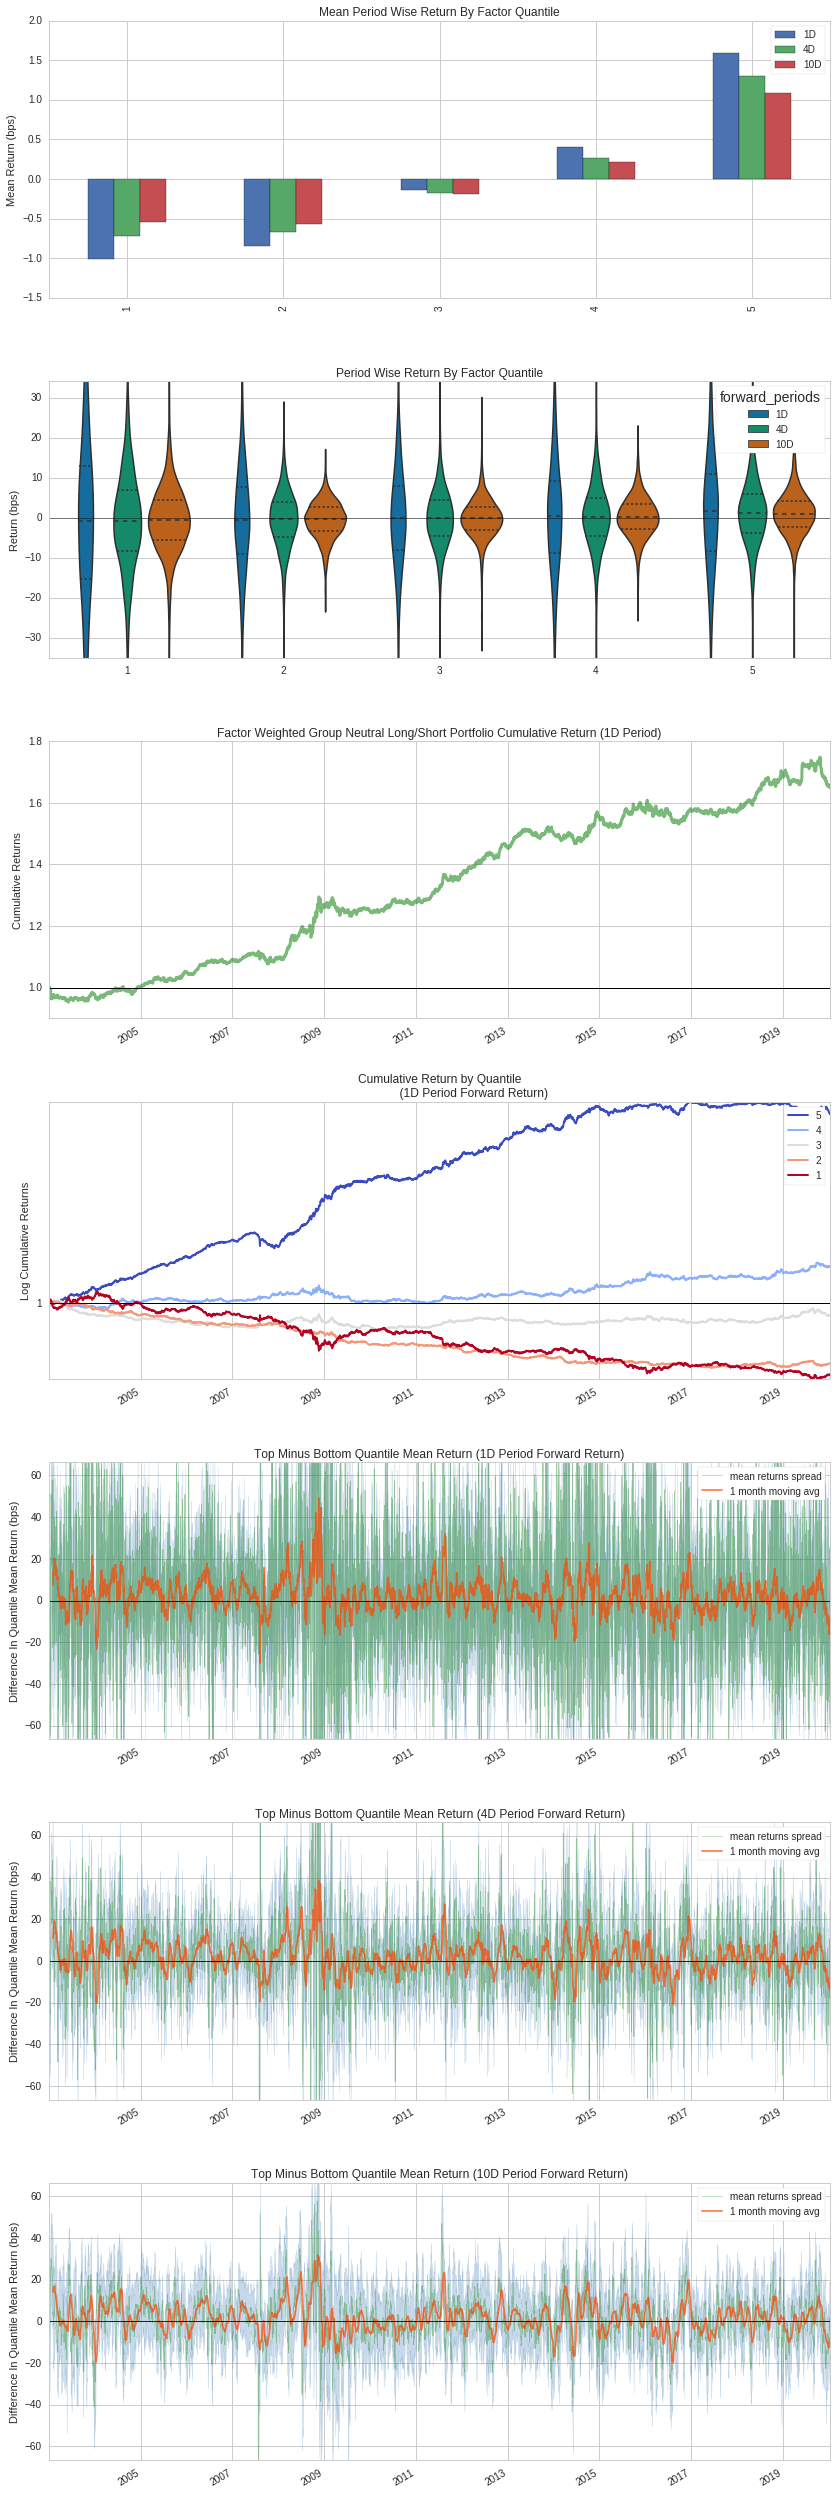

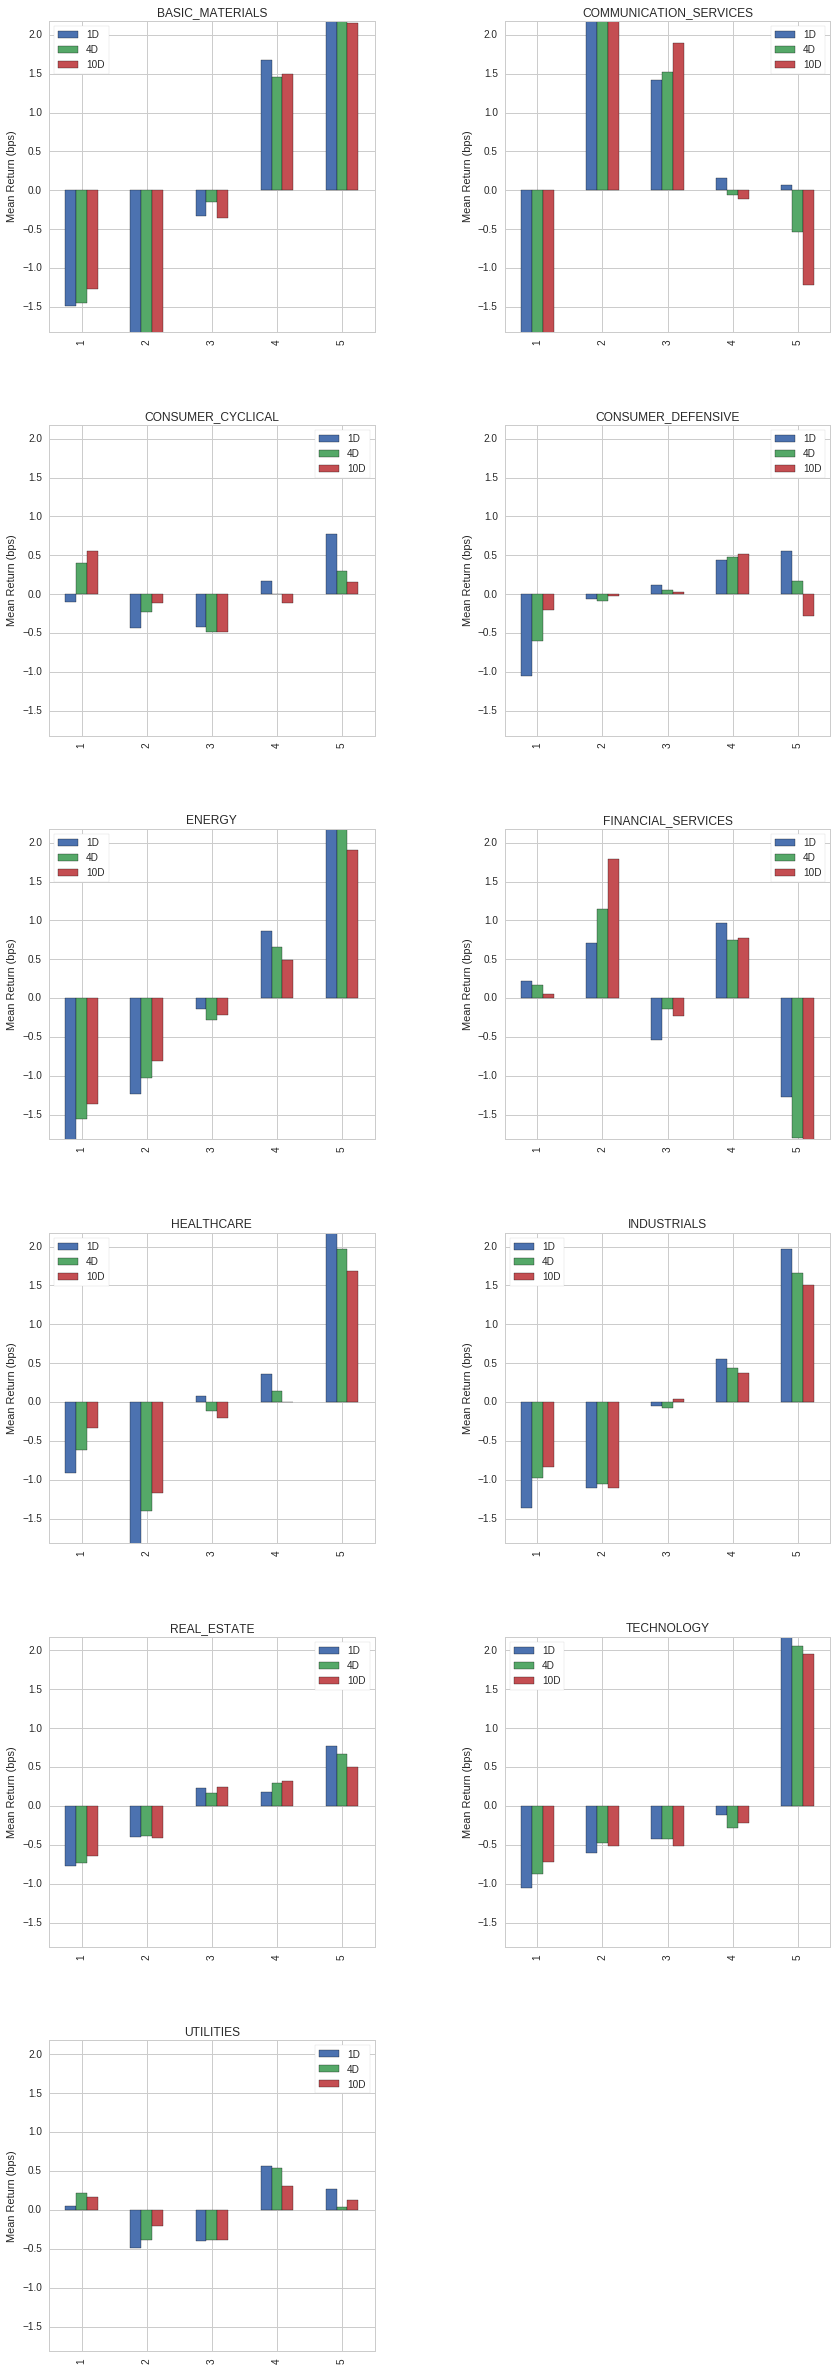

Information Analysis


,1D,4D,10D
IC Mean,0.009,0.013,0.016
IC Std.,0.052,0.056,0.055
Risk-Adjusted IC,0.176,0.237,0.289
t-stat(IC),11.560,15.515,18.938
p-value(IC),0.000,0.000,0.000
IC Skew,0.036,0.082,0.071
IC Kurtosis,0.340,0.459,0.156


/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


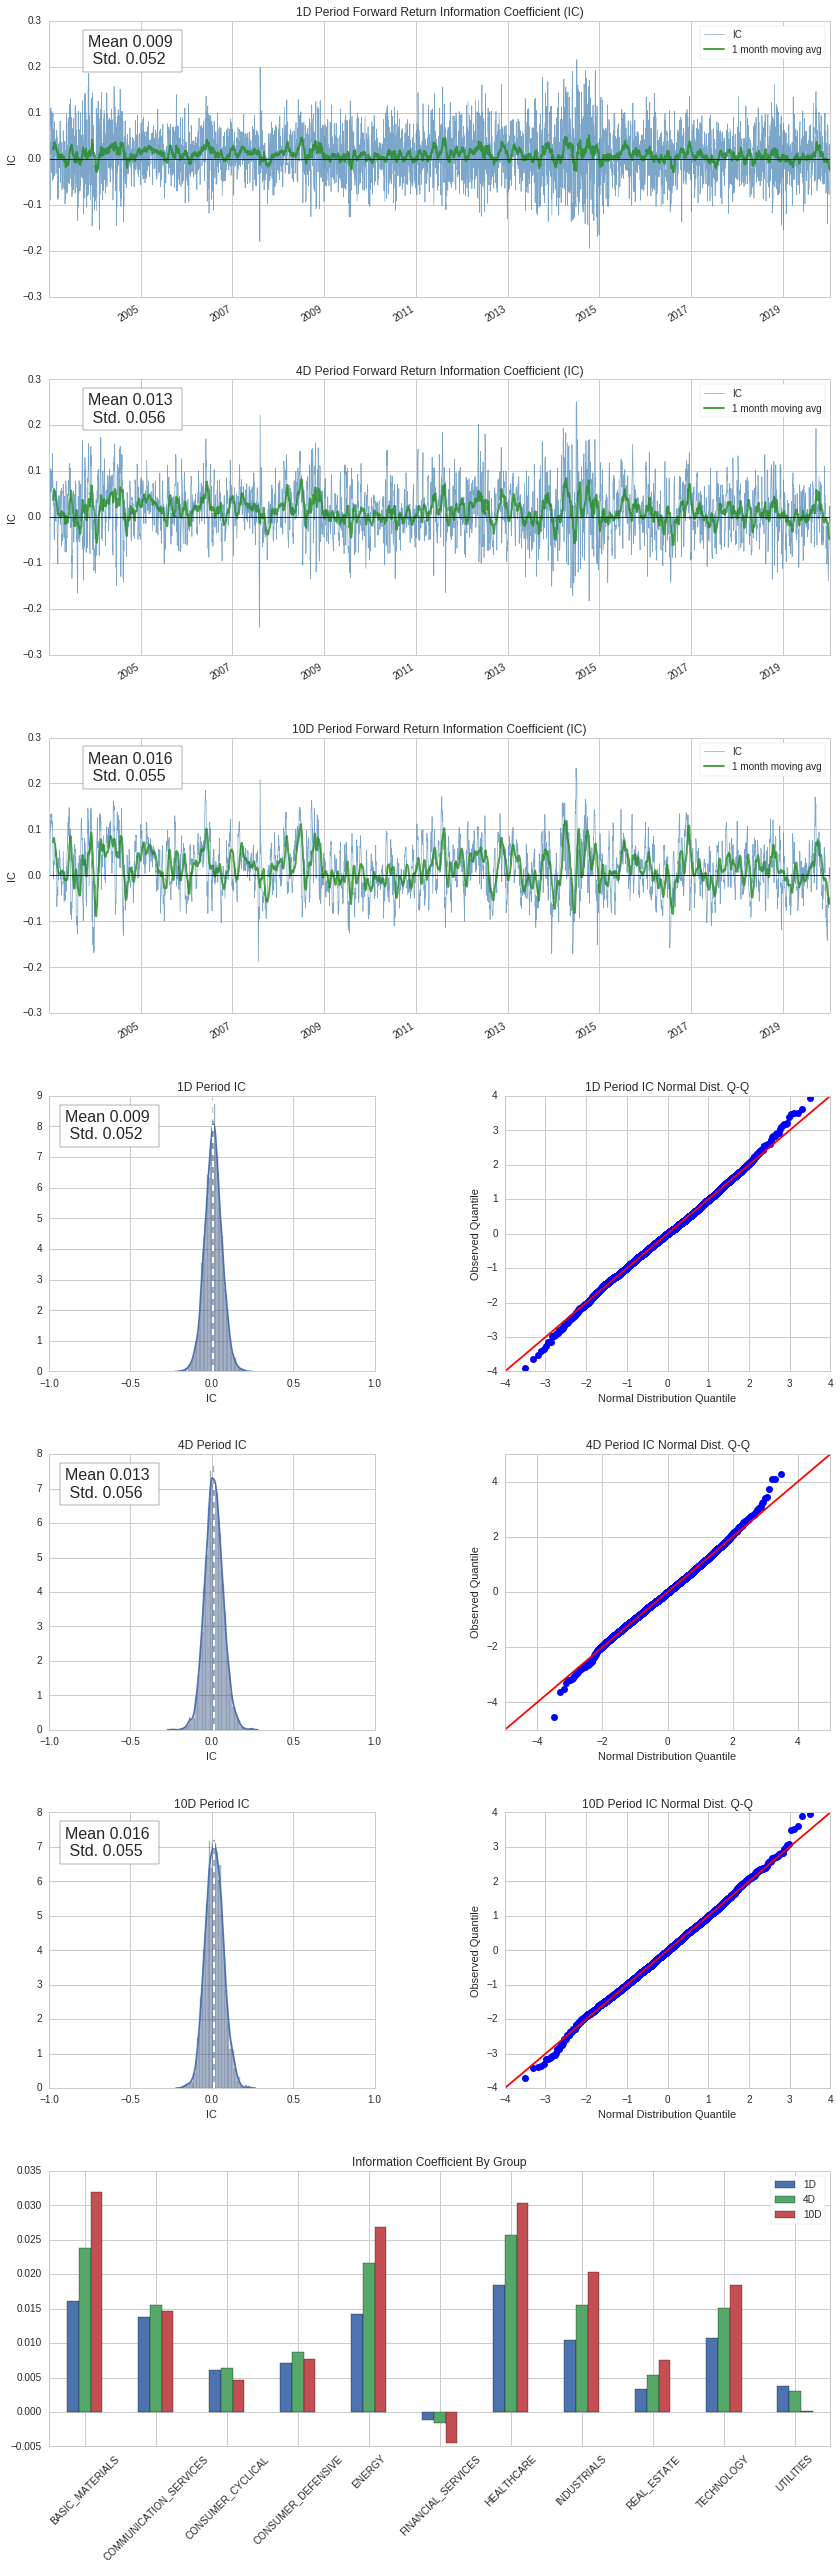

/venvs/py35/lib/python3.5/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


Turnover Analysis


,1D,4D,10D
Quantile 1 Mean Turnover,0.017,0.056,0.123
Quantile 2 Mean Turnover,0.026,0.082,0.171
Quantile 3 Mean Turnover,0.030,0.091,0.188
Quantile 4 Mean Turnover,0.030,0.092,0.192
Quantile 5 Mean Turnover,0.020,0.066,0.146


,1D,4D,10D
Mean Factor Rank Autocorrelation,0.989,0.954,0.886


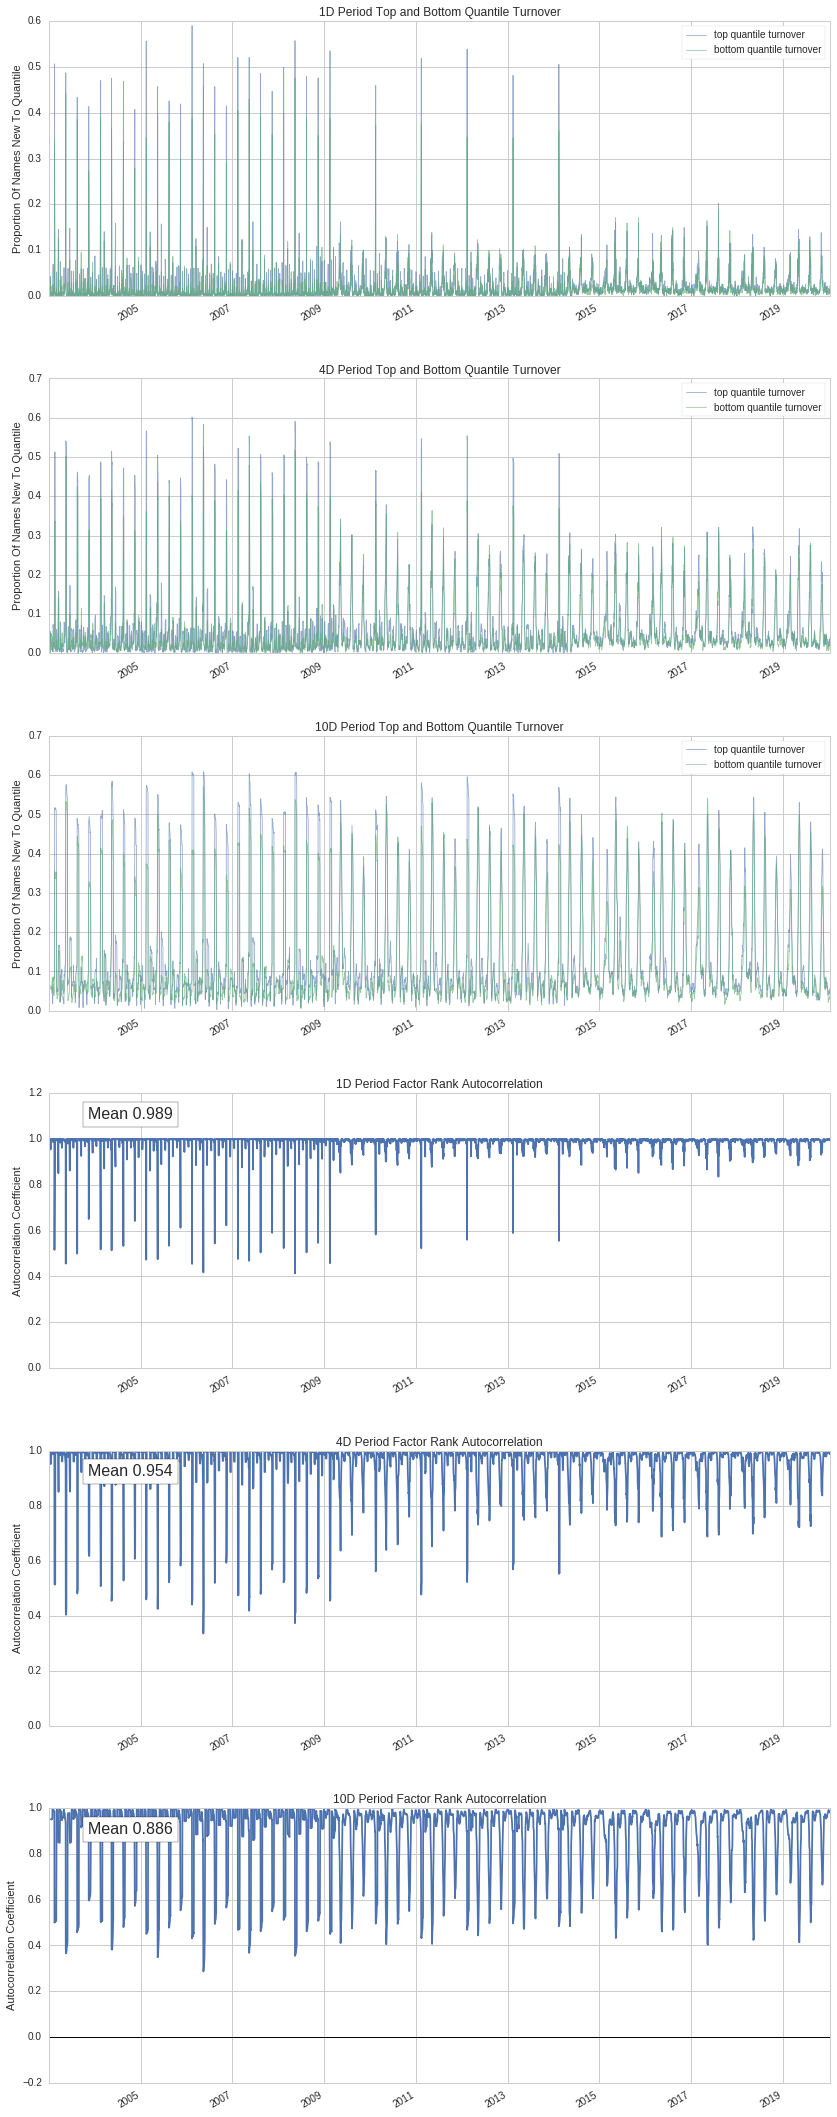

In [17]:
create_full_tear_sheet(merged_data, long_short=True, by_group=True, group_neutral=True)